# Entendiendo KMeans con MNIST dataset

En esta práctica vamos a entender cómo funciona el algoritmo de clústering MNIST con ayuda de dataset de MNIST.

Lo primero que debemos hacer es cargar la librería `sklearn`:

In [0]:
import sklearn

A continuación, cargamos el dataset de MNIST, que ha sido denominado `digits`:

In [0]:
from sklearn.datasets import load_digits
mnist = load_digits()

Este dataset contiene un total de 1797 imágenes de dígitos manuscritos en imágenes de una resolución de 8x8 píxeles. Los dígitos van desde el 0 hasta el 9, por lo que, en total, hay 10 clases diferentes. El dataset está balanceado puesto que hay, aproximadamente, 180 muestras por cada clase.

El dataset está preparado para que podamos visualizar la imágenes de los dígitos. En concreto, el campo `images` contiene una matriz cuadrada bidimensional de 8 filas y 8 columnas en las que cada valor se corresponde con la cantidad de color negro de un pixel.

Veamos como se ha codificado:

In [0]:
# Comprueba el valor que tiene mnist.images[0]. ¿Qué observas? ¿Sabes de qué número se trata?
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

En lugar de una representación matricial de los número podemos obtener, con ayuda de MatPlotLib una representación gráfica de los mismos.

Para ello, debemos cargar la librería MatPlotLib:

In [0]:
import matplotlib.pyplot as plt

Y escribir una función que permita pintar un array dígitos manuscritos:

In [0]:
import math
def paint_digits (images):
  for index, image in enumerate(images):
    plt.subplot(math.ceil(len(images)/5), 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')


Veamos que forma tienen los números manuscritos:

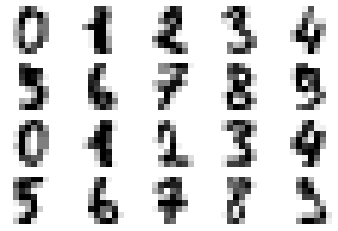

In [0]:
# Imprime los 20 primeros dígitos mnist.images. ¿Puedes reconocer ahora los números?
paint_digits(mnist.images[:20])

Evidentemente, esta representación matricial no es adecuada para ser utilizada por un algoritmo de Machine Learning. Necesitamos que cada imagen sea un vector unidimensional.

Como siempre, los datos del dataset se encuentra en el objeto `data`.

In [0]:
# Compara un elemento del objeto images con el mismo elemento del objeto data. ¿Puede ver cómo se están codificando las imágenes?
mnist.images[0]
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Ahora que hemos codificado nuestras imágenes en vectores, vamos a proceder a ejecutar el algoritmo KMeans. Como sabemos, este algoritmo es de aprendizaje no supervisado, por lo que para esta actividad, ignoraremos completamente cualquier referencia a `mnist.target` que contiene las clases de cada uno de los digitos manuscritos.

El objetivo de esta actividad es entender cómo funciona el algoritmo KMeans y, por lo tanto, vamos a prescindir de cualquier medida de calidad estudidada. Esto implica que NO debemos dividir el dataset en entrenamiento y test. Utilizaremos TODOS los datos que tenemos para entrenar nuestro modelo KMeans y luego analizaremos los resultados obtenidos.

Procedemos, por tanto, a ejecutar KMeans sobre los datos disponibles, es decir, sobre `mnist.data`:

In [7]:
# Ejecuta el algoritmo KMeans sobre todas las features del dataset. ¿Cuántos clusters debemos indicarle?
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10, random_state=0)
kmeans.fit(mnist.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Tras su entrenamiento, KMeans genera un centroide por cada cluster definido. Este centroide podemos entenderlo como la muestra promedio de cada uno de los clusters encontrados. La forma del centroide será idéntica a la forma de los datos con los que se ha entrenado.

Podemos acceder a los centroides de KMeans mediante `kmeans.cluster_centers_`.

In [0]:
# Observa los centroides de KMeans. ¿Qué ves?
kmeans.cluster_centers_

array([[ 0.00000000e+00, -9.99200722e-16,  3.07228916e-01,
         7.16265060e+00,  1.19457831e+01,  1.93373494e+00,
         1.50602410e-01,  5.42168675e-02, -2.25514052e-17,
         1.20481928e-02,  3.28313253e+00,  1.37951807e+01,
         8.46385542e+00,  1.53012048e+00,  9.75903614e-01,
         2.77108434e-01, -1.12757026e-17,  6.44578313e-01,
         1.07108434e+01,  1.15602410e+01,  4.33734940e+00,
         5.25903614e+00,  3.87349398e+00,  3.25301205e-01,
         6.02409639e-03,  4.75903614e+00,  1.47590361e+01,
         5.86144578e+00,  6.87951807e+00,  1.07530120e+01,
         6.21686747e+00,  1.80722892e-02,  0.00000000e+00,
         8.92771084e+00,  1.48072289e+01,  9.35542169e+00,
         1.28132530e+01,  1.43915663e+01,  5.48192771e+00,
         0.00000000e+00,  9.63855422e-02,  6.50602410e+00,
         1.16867470e+01,  1.23433735e+01,  1.48373494e+01,
         1.07590361e+01,  1.56626506e+00, -4.16333634e-17,
         6.02409639e-02,  1.11445783e+00,  3.00000000e+0

Puesto que los centroides son idénticos (en estructura) a cualquiera de los datos con los que hemos entrenado KMeans... ¡Podemos pintarlos!

In [5]:
# Pinta los centroides de KMeans con ayuda de la función paint_digit
# Nota: ten en cuenta que la función paint_digits espera recibir una matriz y no un vector. Puedes cambiar su forma con .reshape(8,8)
paint_digits(list(map(lambda centroid: centroid.reshape(8, 8), kmeans.cluster_centers_)))

NameError: ignored

KeyboardInterrupt: ignored

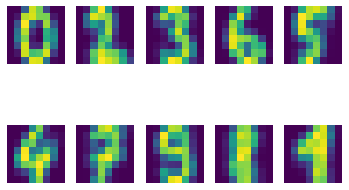

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from IPython import display


for iters in range(1,500,1):
  kmeans = KMeans(n_clusters = 10, random_state=42, max_iter=iters)
  kmeans.fit(mnist.data)

  

  for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    fig = kmeans.cluster_centers_[i].reshape(8, 8)
    plt.imshow(fig)

  
  #plt.close()
  #plt.imshow(fig, animated=True)

  #plt.show()
  display.clear_output(wait=True)
  display.display(plt.gcf())
  time.sleep(0.25)

Recuerda, no se han utilizado las etiquetas en ningún momento. El algoritmo ha "aprendido a escribir" sin indicarle cuál era cada dígito.

Vamos a analizar la solución. Como puedes ver, hay número que se parecen más (en forma) y números que se parecen menos. 

Compararemos la distancia (euclidea) entre los centroides para ver cuáles se parecen más. Para ello, podemos usar `sklearn.metrics.pairwise.euclidean_distances`. Esta función permite comparar los vectores fila de dos matrices (como los que tenemos en `kmeans.cluster_centers_`).

Cargamos el módulo:

In [0]:
from sklearn.metrics.pairwise import euclidean_distances

Calculamos las distancias:

In [0]:
dist = euclidean_distances(kmeans.cluster_centers_, kmeans.cluster_centers_)

Si mostramos `dist` directamente, será dificil analizar los resultados. Formateamos la salida de `numpy` para que la lectura sea más sencilla.

In [0]:
import numpy as np
np.set_printoptions(precision=1,floatmode='fixed')
print(np.matrix(dist))

[[ 0.0 45.0 36.8 39.9 34.3 36.2 33.9 32.1 44.5 31.2]
 [45.0  0.0 34.4 19.2 33.7 36.6 36.1 33.3 29.1 41.6]
 [36.8 34.4  0.0 30.5 30.1 37.1 40.5 29.9 33.3 37.7]
 [39.9 19.2 30.5  0.0 33.6 28.4 32.5 32.6 31.8 35.4]
 [34.3 33.7 30.1 33.6  0.0 41.1 35.8 27.0 38.0 43.0]
 [36.2 36.6 37.1 28.4 41.1  0.0 43.0 39.7 41.5 34.4]
 [33.9 36.1 40.5 32.5 35.8 43.0  0.0 33.8 45.4 44.1]
 [32.1 33.3 29.9 32.6 27.0 39.7 33.8  0.0 27.2 34.4]
 [44.5 29.1 33.3 31.8 38.0 41.5 45.4 27.2  0.0 35.8]
 [31.2 41.6 37.7 35.4 43.0 34.4 44.1 34.4 35.8  0.0]]
